## 540:540 – Computational Methods – Spring 2021 Final Exam

### Using Python programming language do the following:
#### 1. Load the IRIS classification dataset provided on scikit-learn library.
#### 2. Split the dataset into training (50%), validation (20%), and testing (30%).
#### 3. Construct a classification model for the IRIS dataset using:
##### a. Support Vector Machines (use RBF kernel)
##### b. Decision Tree
##### c. Artificial Neural Network (MLP): use the sigmoid function as an activation function and only three layers (input, one intermediate, output).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import random
import sklearn

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
iris = datasets.load_iris()
# Convert the dataset to dataframe with adjustment
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target']) 
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df = df[['target', 'species', "sepal length (cm)",	"sepal width (cm)",	"petal length (cm)","petal width (cm)"]]
df.head()

,target,species,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.0,setosa,5.1,3.5,1.4,0.2
1,0.0,setosa,4.9,3.0,1.4,0.2
2,0.0,setosa,4.7,3.2,1.3,0.2
3,0.0,setosa,4.6,3.1,1.5,0.2
4,0.0,setosa,5.0,3.6,1.4,0.2


In [3]:
X = df.iloc[:,2:] #data
y = df.iloc[:,0] #target

In [4]:
from sklearn.model_selection import train_test_split
np.random.seed(seed=540)
# Split the iris dataset into training (50%), validation (20%), and testing (30%)
train_ratio = 0.5
validation_ratio = 0.3
test_ratio = 0.2

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=validation_ratio/(test_ratio + validation_ratio)) 

In [5]:
# a. Classification model for the IRIS dataset using Support Vector Machines (use RBF kernel) 

from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error,r2_score

svc_rbf = SVC(kernel='rbf', C=1e4, gamma=0.1)

y_rbf = svc_rbf.fit(x_train, y_train).predict(x_test)

In [6]:
print("With rbf kernel，R2 score is:", r2_score(y_test, y_rbf),",Mean squared error: %.2f"% mean_squared_error(y_test, y_rbf),',the Variance score: %.2f(best fit = 1)' % r2_score(y_test, y_rbf))

With rbf kernel，R2 score is: 0.8397435897435898 ,Mean squared error: 0.11 ,the Variance score: 0.84(best fit = 1)


In [7]:
print(confusion_matrix(y_test, y_rbf))
print(classification_report(y_test, y_rbf))

[[19  0  0]
 [ 1 11  1]
 [ 0  3 10]]
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97        19
         1.0       0.79      0.85      0.81        13
         2.0       0.91      0.77      0.83        13

    accuracy                           0.89        45
   macro avg       0.88      0.87      0.87        45
weighted avg       0.89      0.89      0.89        45



In [8]:
# Optimization by the GridsearchCV

from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 50, 100,300,500,1000],
                         'gamma': [0.00001, 0.0001, 0.001, 0.1, 1,10,100,1000],'kernel': ['rbf']}

grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(x_train,y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] END .....................C=0.1, gamma=1e-05, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=1e-05, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=1e-05, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=1e-05, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=1e-05, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.00

[CV] END ....................C=100, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ....................C=100, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ....................C=100, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ....................C=100, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ....................C=100, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .......................C=100, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=100, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ...................

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 50, 100, 300, 500, 1000],
                         'gamma': [1e-05, 0.0001, 0.001, 0.1, 1, 10, 100, 1000],
                         'kernel': ['rbf']},
             verbose=2)

In [9]:
print(grid.best_estimator_)

SVC(C=1000, gamma=0.001)


In [10]:
# Let C=1000, gamma=0.1:

svc_rbf = SVC(kernel='rbf', C=1000, gamma=0.1)
y_rbf = svc_rbf.fit(x_train, y_train).predict(x_val)
print("With rbf kernel，R2 score is:", r2_score(y_val, y_rbf),",Mean squared error: %.2f"% mean_squared_error(y_val, y_rbf),',the Variance score: %.2f(best fit = 1)' % r2_score(y_val, y_rbf))
print(confusion_matrix(y_val, y_rbf))
print(classification_report(y_val, y_rbf))

With rbf kernel，R2 score is: 0.9090909090909091 ,Mean squared error: 0.07 ,the Variance score: 0.91(best fit = 1)
[[11  0  0]
 [ 0  8  0]
 [ 0  2  9]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        11
         1.0       0.80      1.00      0.89         8
         2.0       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.93      0.94      0.93        30
weighted avg       0.95      0.93      0.93        30



In [11]:
# b. Classification model for the IRIS dataset using decision trees
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

clf = DecisionTreeClassifier()
y_clf = clf.fit(x_train, y_train).predict(x_test)

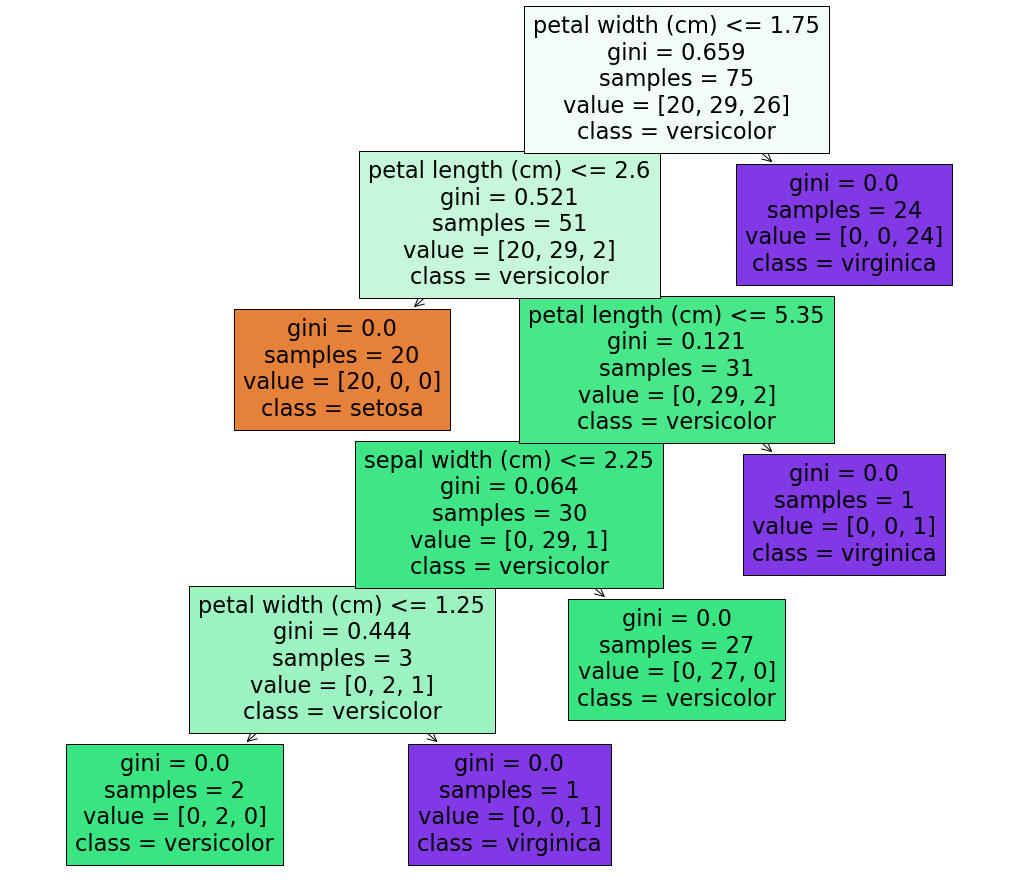

In [12]:
fig_clf = plt.figure(figsize=(18,16))
_ = tree.plot_tree(clf, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)

In [13]:
print("With Decision tree classification，R2 score is:", r2_score(y_test, y_clf),",Mean squared error: %.2f"% mean_squared_error(y_test, y_clf),',the Variance score: %.2f(best fit = 1)' % r2_score(y_test, y_clf))

With Decision tree classification，R2 score is: 0.9038461538461539 ,Mean squared error: 0.07 ,the Variance score: 0.90(best fit = 1)


In [14]:
print(confusion_matrix(y_test, y_clf))
print(classification_report(y_test, y_clf))

[[19  0  0]
 [ 0 11  2]
 [ 0  1 12]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        19
         1.0       0.92      0.85      0.88        13
         2.0       0.86      0.92      0.89        13

    accuracy                           0.93        45
   macro avg       0.92      0.92      0.92        45
weighted avg       0.93      0.93      0.93        45



In [15]:
# Optimization by tuning the parameter:
param_clf = {
        'criterion':['entropy','gini'],
        "max_depth":[2,3,4,5,6],
        "min_samples_split":[2,3,4,5,6],
        "min_samples_leaf":[2,3,4,5,6]
}
grid = GridSearchCV(clf,param_grid=param_clf,
                                     cv=10,verbose=1,n_jobs=1)
grid.fit(x_train,y_train)

Fitting 10 folds for each of 250 candidates, totalling 2500 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 3, 4, 5, 6],
                         'min_samples_leaf': [2, 3, 4, 5, 6],
                         'min_samples_split': [2, 3, 4, 5, 6]},
             verbose=1)

In [16]:
print(grid.best_params_)

{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [17]:
print(grid.best_score_)

0.9589285714285716


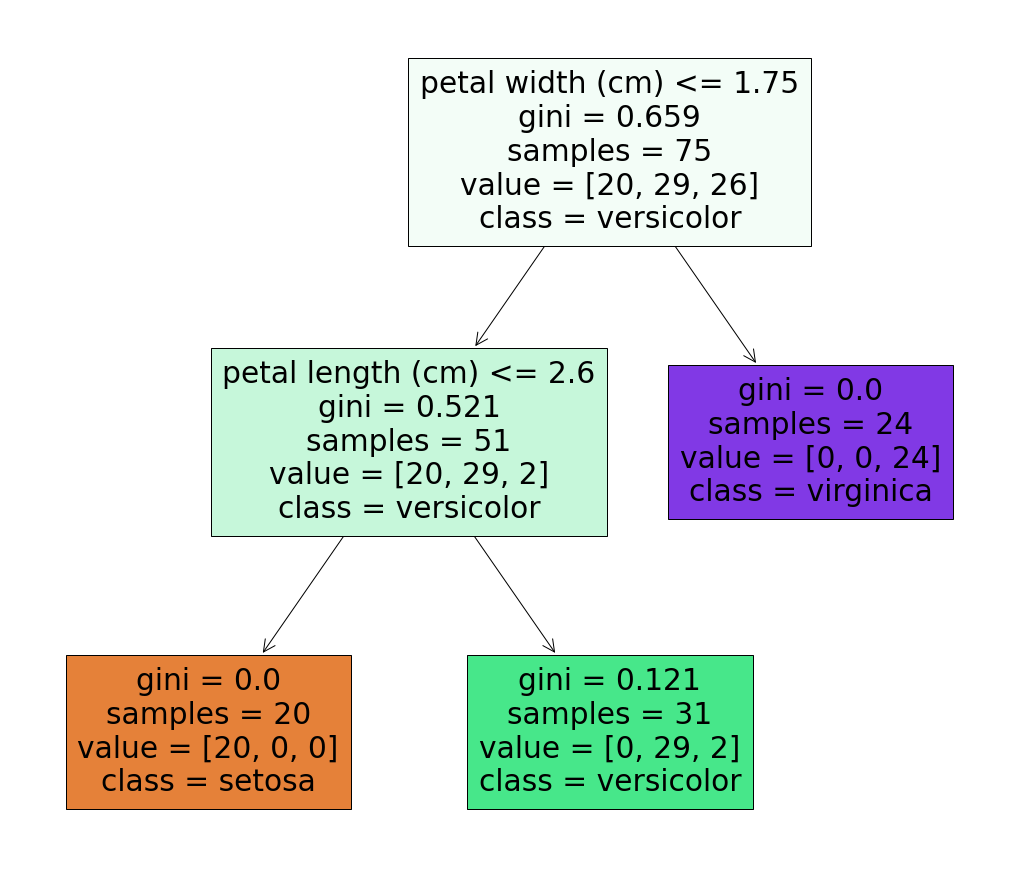

In [18]:
# set the parameters:'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2

clf = DecisionTreeClassifier(criterion='gini',max_depth=2,min_samples_leaf=2,min_samples_split=2)
y_clf = clf.fit(x_train, y_train).predict(x_val)
fig_clf = plt.figure(figsize=(18,16))
_ = tree.plot_tree(clf, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)

In [19]:
print("With Decision tree classification，R2 score is:", r2_score(y_val, y_clf),",Mean squared error: %.2f"% mean_squared_error(y_val, y_clf),',the Variance score: %.2f(best fit = 1)' % r2_score(y_val, y_clf))
print(confusion_matrix(y_val, y_clf))
print(classification_report(y_val, y_clf))

With Decision tree classification，R2 score is: 0.9545454545454546 ,Mean squared error: 0.03 ,the Variance score: 0.95(best fit = 1)
[[11  0  0]
 [ 0  8  0]
 [ 0  1 10]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        11
         1.0       0.89      1.00      0.94         8
         2.0       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [20]:
# c. Classification model for the IRIS dataset using Artificial Neural Network (MLP)(use the sigmoid function as an activation)

from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10),activation='logistic',solver='adam')
y_mlp = mlp.fit(x_train, y_train).predict(x_test)

/opt/homebrew/Caskroom/miniconda/base/envs/p39/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [21]:
print(confusion_matrix(y_test,y_mlp))
print(classification_report(y_test,y_mlp))
print("With ANN method，R2 score is:", r2_score(y_test, y_mlp),",Mean squared error: %.2f"% mean_squared_error(y_test, y_mlp),',the Variance score: %.2f(best fit = 1)' % r2_score(y_test, y_mlp))

[[18  1  0]
 [ 0  9  4]
 [ 0  0 13]]
              precision    recall  f1-score   support

         0.0       1.00      0.95      0.97        19
         1.0       0.90      0.69      0.78        13
         2.0       0.76      1.00      0.87        13

    accuracy                           0.89        45
   macro avg       0.89      0.88      0.87        45
weighted avg       0.90      0.89      0.89        45

With ANN method，R2 score is: 0.8397435897435898 ,Mean squared error: 0.11 ,the Variance score: 0.84(best fit = 1)


In [22]:
# Optimization by tuning the parameter:
param_MLP={
                    "learning_rate":['constant','adaptive'],
                    "hidden_layer_sizes": [(10),(30,20),(20, 10),(30,20,10)],
                     "solver": ['adam', 'sgd', 'lbfgs'],
                      'activation': ["logistic", "relu", "Tanh"],
}

grid = GridSearchCV(mlp ,param_grid=param_MLP,n_jobs=-1,verbose=2,cv=10)
grid.fit(x_train,y_train)

Fitting 10 folds for each of 72 candidates, totalling 720 fits


/opt/homebrew/Caskroom/miniconda/base/envs/p39/lib/python3.9/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.7625     0.37321429 0.94642857 0.8125     0.46785714 0.94642857
 0.97321429 0.3875     0.94464286 0.92321429 0.3875     0.93214286
 0.78035714 0.36785714 0.91785714 0.79821429 0.37321429 0.93035714
 0.71607143 0.34464286 0.91785714 0.68214286 0.32142857 0.93035714
 0.71428571 0.83214286 0.93035714 0.725      0.82678571 0.94642857
 0.97321429 0.94464286 0.95714286 0.97142857 0.97321429 0.93035714
 0.80714286 0.97321429 0.93035714 0.94285714 0.87857143 0.94464286
 0.97142857 0.85       0.94464286 0.97321429 0.95714286 0.93035714
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan]
  warnings.warn(
/op

GridSearchCV(cv=10,
             estimator=MLPClassifier(activation='logistic',
                                     hidden_layer_sizes=10),
             n_jobs=-1,
             param_grid={'activation': ['logistic', 'relu', 'Tanh'],
                         'hidden_layer_sizes': [10, (30, 20), (20, 10),
                                                (30, 20, 10)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['adam', 'sgd', 'lbfgs']},
             verbose=2)

In [23]:
grid.best_params_

{'activation': 'logistic',
 'hidden_layer_sizes': (30, 20),
 'learning_rate': 'constant',
 'solver': 'adam'}

In [24]:
grid.best_score_

0.9732142857142858

In [25]:
mlp = MLPClassifier(hidden_layer_sizes=(30,20,10),activation='relu',learning_rate='constant',solver='adam')
y_mlp = mlp.fit(x_train, y_train).predict(x_val)

/opt/homebrew/Caskroom/miniconda/base/envs/p39/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [26]:
print(confusion_matrix(y_val,y_mlp))
print(classification_report(y_val,y_mlp))
print("With ANN method，R2 score is:", r2_score(y_val,y_mlp),",Mean squared error: %.2f"% mean_squared_error(y_val, y_mlp))

[[11  0  0]
 [ 0  8  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        11
         1.0       1.00      1.00      1.00         8
         2.0       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

With ANN method，R2 score is: 1.0 ,Mean squared error: 0.00


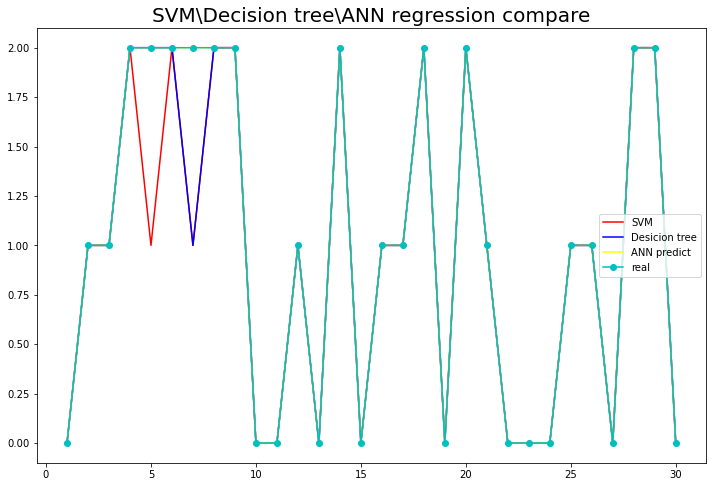

In [27]:
plt.figure(figsize=(12,8))
x_s = np.arange(1,len(x_val) + 1)
plt.plot(x_s, y_rbf,color='red', label="SVM")
plt.plot(x_s, y_clf, color='blue',label="Desicion tree")
plt.plot(x_s, y_mlp,color='yellow',label="ANN predict")
plt.plot(x_s, y_val, 'co-', label="real")
plt.title('SVM\Decision tree\ANN regression compare', fontsize=20)
plt.legend()

In [28]:
# Visualizing the optimized classifiers with Iris Sepal and Petal features

/opt/homebrew/Caskroom/miniconda/base/envs/p39/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


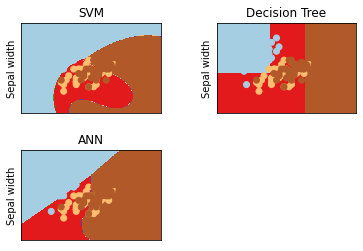

In [29]:
# Iris Sepal features

# step of the grid
h =.02
c = iris.target

x_min, x_max = x_train.iloc[:,0].min()-1, x_train.iloc[:,0].max()+1
y_min, y_max = x_train.iloc[:,1].min()-1, x_train.iloc[:,1].max()+1

xx, yy = np.meshgrid(np.arange(x_min,x_max,h), np.arange(y_min,y_max,h))

# the title of the graph
titles = ['SVM',
                'Decision Tree',
                'ANN']


svm_star = svc_rbf.fit(x_train.iloc[:,0:2], y_train)
dt_star = clf.fit(x_train.iloc[:,0:2], y_train)
mlp_star = mlp.fit(x_train.iloc[:,0:2], y_train)


for i, star in enumerate((svm_star,dt_star,mlp_star)):
        # to plot the edge of different classes
        #  to create a 2*2 grid , and set the i image as current image
        plt.subplot(2,2,i+1)
        #set the margin between different subplot
        plt.subplots_adjust(wspace=0.4,hspace=0.4)

        #svm input :xx and yyout put an array

        Z = star.predict(np.c_[xx.ravel(), yy.ravel()])
        #feel this body

        #  plot the result
        Z = Z.reshape(xx.shape) 
        plt.contourf(xx,yy,Z, cmap=plt.cm.Paired)
        plt.scatter(X.iloc[:,:1], X.iloc[:,1:2],c = c,cmap=plt.cm.Paired)
        plt.ylabel('Sepal width')
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.xticks(())
        plt.yticks(())
        plt.title(titles[i])

/opt/homebrew/Caskroom/miniconda/base/envs/p39/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


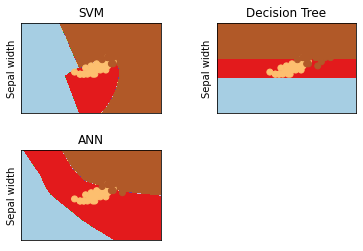

In [30]:
# Iris Petal features

# step of the grid
h =.02

c = iris.target

x_min, x_max = x_train.iloc[:,2].min()-1, x_train.iloc[:,2].max()+1
y_min, y_max = x_train.iloc[:,3].min()-1, x_train.iloc[:,3].max()+1

xx, yy = np.meshgrid(np.arange(x_min,x_max,h), np.arange(y_min,y_max,h))

# the title of the graph
titles = ['SVM',
                'Decision Tree',
                'ANN']

svm_star = svc_rbf.fit(x_train.iloc[:,2:], y_train)
dt_star = clf.fit(x_train.iloc[:,2:], y_train)
mlp_star = mlp.fit(x_train.iloc[:,2:], y_train)


for i, star in enumerate((svm_star,dt_star,mlp_star)):
        # to plot the edge of different classes
        #  to create a 2*2 grid , and set the i image as current image
        plt.subplot(2,2,i+1)
        #set the margin between different subplot
        plt.subplots_adjust(wspace=0.4,hspace=0.4)

        #svm input :xx and yyout put an array

        Z = star.predict(np.c_[xx.ravel(), yy.ravel()])
        #feel this body

        #  plot the result
        Z = Z.reshape(xx.shape) 
        plt.contourf(xx,yy,Z, cmap=plt.cm.Paired)
        plt.scatter(X.iloc[:,2], X.iloc[:,3],c = c,cmap=plt.cm.Paired)
        plt.ylabel('Sepal width')
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.xticks(())
        plt.yticks(())
        plt.title(titles[i])